# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [82]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [60]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=3, sort_keys=True))


{
   "data": {
      "1": {
         "circulating_supply": 18770656,
         "id": 1,
         "last_updated": 1627606692,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 749794782431,
               "percent_change_1h": -0.0808924495523145,
               "percent_change_24h": 1.04310014102677,
               "percent_change_7d": 23.2521891399893,
               "percentage_change_1h": -0.0808924495523145,
               "percentage_change_24h": 1.04310014102677,
               "percentage_change_7d": 23.2521891399893,
               "price": 39945.0,
               "volume_24h": 28807559620
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 18770656,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1627606692
   }
}


In [61]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3, sort_keys=True))


{
   "data": {
      "1027": {
         "circulating_supply": 116894923,
         "id": 1027,
         "last_updated": 1627606763,
         "max_supply": 0,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 279322726362,
               "percent_change_1h": 0.501268417223304,
               "percent_change_24h": 4.99428207690238,
               "percent_change_7d": 17.8145649584075,
               "percentage_change_1h": 0.501268417223304,
               "percentage_change_24h": 4.99428207690238,
               "percentage_change_7d": 17.8145649584075,
               "price": 2388.73,
               "volume_24h": 18837758296
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 116894923,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1627606763
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
btc_price


39985.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
eth_price


2378.76

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
btc_value


47982.0

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
eth_value


12607.428

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


60589.428

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [188]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
today = str(datetime.datetime.now()).split()[0]
today_iso = pd.Timestamp(today, tz="America/Los_Angeles").isoformat()
yesterday = str(datetime.datetime.now() - datetime.timedelta(days=1)).split()[0]
yesterday_iso = pd.Timestamp(yesterday, tz= "America/Los_Angeles").isoformat()
yesterday_iso
start_date = yesterday_iso
end_date = yesterday_iso
yesterday, yesterday_iso

('2021-07-28', '2021-07-28T00:00:00-07:00')

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [55]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit=365,
    start = yesterday_iso,
    end = yesterday_iso
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-07-28 00:00:00-04:00  116.24  116.49  116.14  116.48  5189696  439.68   

                                                            
                            high     low   close    volume  
time                                                        
2021-07-28 00:00:00-04:00  440.3  437.31  438.84  47642330

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [56]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print the AGG closing price
print(agg_close_price)


116.48


In [57]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print the SPY closing price
spy_close_price


438.84

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [58]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
agg_value


23296.0

In [59]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value

48272.399999999994

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds

71568.4

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
total_portfolio, total_crypto_wallet


(132157.82799999998, 60589.428)

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[60589.428, 71568.4]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"],index=["crypto", "stock/bond"])

# Display the savings_df DataFrame
savings_df


,amount
crypto,60589.428
stock/bond,71568.400


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

array([<AxesSubplot:ylabel='amount'>], dtype=object)

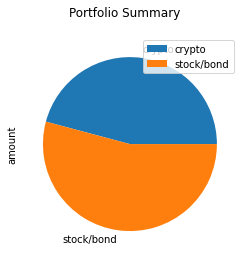

In [32]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(title="Portfolio Summary", subplots=True)


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [33]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [41]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations, your account is ${total_portfolio - emergency_fund_value :.02f} over the recommended amount!")
elif total_portfolio == emergency_fund_value:
        print("Congratulations, you have exactly the recommended amount in your account!")
elif total_portfolio < emergency_fund_value:
        print(f"Your account is ${emergency_fund_value - total_portfolio :.02f} under the recommended amount.")
# YOUR CODE HERE
# YOUR CODE HERE


Congratulations, your account is $96157.83 over the recommended amount!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [191]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 
# yesterday_iso = pd.Timestamp(yesterday, tz= "America/Los_Angeles").isoformat()
start_date_mc = today_iso
# # YOUR CODE HERE
first_end_date_mc = datetime.datetime.now() - datetime.timedelta(days=1000)
first_end_date = str(first_end_date_mc).split()[0]
first_end_date = pd.Timestamp(first_end_date, tz="America/Los_Angeles").isoformat()
first_end_date

'2018-11-02T00:00:00-07:00'

In [158]:
sec_end_date_mc = first_end_date_mc - datetime.timedelta(days=1000)
sec_end_date = str(sec_end_date_mc).split()[0]
sec_end_date = pd.Timestamp(sec_end_date, tz= "America/Los_Angeles").isoformat()
sec_end_date

'2016-02-06T00:00:00-08:00'

In [162]:
third_end_date_mc = sec_end_date_mc - datetime.timedelta(days=1000)
third_end_date = str(third_end_date_mc).split()[0]
third_end_date = pd.Timestamp(third_end_date, tz="America/Los_Angeles").isoformat()
third_end_date

'2013-05-12T00:00:00-07:00'

In [163]:
fourth_end_date_mc = third_end_date_mc - datetime.timedelta(days=653)
fourth_end_date = str(fourth_end_date_mc).split()[0]
fourth_end_date = pd.Timestamp(fourth_end_date, tz="America/Los_Angeles").isoformat()
fourth_end_date

'2011-07-29T00:00:00-07:00'

In [194]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_portfolio1 = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = first_end_date,
    end = start_date_mc
).df

In [197]:
# Display both the first and last five rows of the DataFrame
df_portfolio1
# YOUR CODE HERE

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2018-11-02 00:00:00-04:00  104.25  104.2900  103.9400  104.010  4207916.0   
2018-11-05 00:00:00-05:00  104.14  104.1700  104.0700  104.090  2912736.0   
2018-11-06 00:00:00-05:00  104.09  104.1699  104.0635  104.100  2442244.0   
2018-11-07 00:00:00-05:00  104.25  104.3600  104.1400  104.195  4613710.0   
2018-11-08 00:00:00-05:00  104.19  104.2200  104.0000  104.005  2921802.0   
...                           ...       ...       ...      ...        ...   
2021-07-23 00:00:00-04:00  116.03  116.2200  116.0300  116.210  4137100.0   
2021-07-26 00:00:00-04:00  116.30  116.3300  116.0850  116.110  7028009.0   
2021-07-27 00:00:00-04:00  116.35  116.4000  116.2727  116.390  4669859.0   
2021-07-28 00:00:00-04:00  116.24  116.4900  116.1400  116.480  5189696.0   
2021-07-29 00:00:00-04:00  116.29  116.3600  116.2250  116.280  5216456.0   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2018-11-02 00:00:00-04:00  274.74  275.23  269.5900  271.80  93545041  
2018-11-05 00:00:00-05:00  272.44  274.01  271.3500  273.38  55157537  
2018-11-06 00:00:00-05:00  273.32  275.30  273.2500  275.12  49731823  
2018-11-07 00:00:00-05:00  277.56  281.10  275.1398  280.91  84960994  
2018-11-08 00:00:00-05:00  280.14  281.22  279.2200  280.44  49392193  
...                           ...     ...       ...     ...       ...  
2021-07-23 00:00:00-04:00  437.53  440.30  436.7900  439.90  53294703  
2021-07-26 00:00:00-04:00  439.31  441.03  439.2600  440.99  40155852  
2021-07-27 00:00:00-04:00  439.91  439.94  435.9900  439.00  61032234  
2021-07-28 00:00:00-04:00  439.68  440.30  437.3100  438.84  47642330  
2021-07-29 00:00:00-04:00  439.83  441.80  439.8100  440.67  40930880  

[688 rows x 10 columns]

In [161]:
df_portfolio2 = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = sec_end_date,
    end = first_end_date
).df
df_portfolio2

AGG                                         SPY  \
                             open     high      low   close    volume    open   
time                                                                            
2016-02-08 00:00:00-05:00  109.52  109.870  109.500  109.75   2569522  185.77   
2016-02-09 00:00:00-05:00  109.92  109.930  109.660  109.74   2861093  183.37   
2016-02-10 00:00:00-05:00  109.82  109.990  109.600  109.98   2046967  186.41   
2016-02-11 00:00:00-05:00  110.33  110.499  110.010  110.08   2686575  182.34   
2016-02-12 00:00:00-05:00  109.92  109.960  109.545  109.76   2640547  184.98   
...                           ...      ...      ...     ...       ...     ...   
2018-10-29 00:00:00-04:00  104.86  104.890  104.720  104.79   3599179  268.78   
2018-10-30 00:00:00-04:00  104.68  104.780  104.640  104.65   2246561  263.67   
2018-10-31 00:00:00-04:00  104.50  104.700  104.500  104.58  11670445  270.65   
2018-11-01 00:00:00-04:00  104.22  104.410  104.210  104.35   6974347  271.62   
2018-11-02 00:00:00-04:00  104.25  104.290  103.940  104.01   4207916  274.74   

                                                              
                             high     low   close     volume  
time                                                          
2016-02-08 00:00:00-05:00  186.12  182.80  185.37  165295833  
2016-02-09 00:00:00-05:00  186.94  183.20  185.38  155558096  
2016-02-10 00:00:00-05:00  188.34  185.12  185.29  125014552  
2016-02-11 00:00:00-05:00  184.10  181.09  183.06  176537848  
2016-02-12 00:00:00-05:00  186.65  183.96  186.64  102758219  
...                           ...     ...     ...        ...  
2018-10-29 00:00:00-04:00  270.25  259.85  263.80  120705901  
2018-10-30 00:00:00-04:00  268.12  263.12  267.81  122643325  
2018-10-31 00:00:00-04:00  273.23  270.12  270.69   97427146  
2018-11-01 00:00:00-04:00  273.73  270.38  273.51   72100016  
2018-11-02 00:00:00-04:00  275.23  269.59  271.80   93545041  

[692 rows x 10 columns]

In [165]:
df_portfolio3 = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = third_end_date,
    end = sec_end_date
).df
df_portfolio3

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2013-05-13 00:00:00-04:00  110.35  110.39  110.2900  110.34   505570  163.20   
2013-05-14 00:00:00-04:00  110.38  110.45  110.1200  110.15   822859  163.67   
2013-05-15 00:00:00-04:00  110.27  110.32  110.1000  110.27   826100  164.96   
2013-05-16 00:00:00-04:00  110.36  110.58  110.3600  110.57  1009562  165.77   
2013-05-17 00:00:00-04:00  110.50  110.51  110.2500  110.30   568038  165.95   
...                           ...     ...       ...     ...      ...     ...   
2016-02-01 00:00:00-05:00  109.10  109.25  108.8415  108.97  4186126  192.53   
2016-02-02 00:00:00-05:00  109.23  109.38  109.1301  109.33  4160559  191.96   
2016-02-03 00:00:00-05:00  109.26  109.64  109.2000  109.29  3546260  191.41   
2016-02-04 00:00:00-05:00  109.34  109.46  109.2350  109.40  1761807  190.71   
2016-02-05 00:00:00-05:00  109.24  109.44  109.1532  109.31  2032871  190.99   

                                                              
                             high     low   close     volume  
time                                                          
2013-05-13 00:00:00-04:00  163.81  162.82  163.54   66015920  
2013-05-14 00:00:00-04:00  165.35  163.67  165.27   89321877  
2013-05-15 00:00:00-04:00  166.45  164.91  166.10   97466123  
2013-05-16 00:00:00-04:00  166.36  165.09  165.31   88283474  
2013-05-17 00:00:00-04:00  167.04  165.73  166.97  100777007  
...                           ...     ...     ...        ...  
2016-02-01 00:00:00-05:00  194.58  191.84  193.69   98369142  
2016-02-02 00:00:00-05:00  191.97  189.54  190.13  128934910  
2016-02-03 00:00:00-05:00  191.78  187.10  191.19  182430296  
2016-02-04 00:00:00-05:00  192.75  189.96  191.55  120427508  
2016-02-05 00:00:00-05:00  191.08  187.20  187.95  141736013  

[690 rows x 10 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [172]:
df_portfolio4 = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = fourth_end_date,
    end = third_end_date
).df
df_portfolio4

AGG                                         \
                             open      high       low     close   volume   
time                                                                       
2011-07-29 00:00:00-04:00  107.80  108.2001  107.7000  108.1600  1095380   
2011-08-01 00:00:00-04:00  107.84  108.2300  107.8200  108.1200  1238450   
2011-08-02 00:00:00-04:00  108.29  108.6700  108.1400  108.5900   972946   
2011-08-03 00:00:00-04:00  108.69  108.9499  108.6100  108.7000  1168138   
2011-08-04 00:00:00-04:00  108.80  109.3700  108.7600  109.2600  1492192   
...                           ...       ...       ...       ...      ...   
2013-05-06 00:00:00-04:00  110.94  111.0000  110.8100  110.8150   627824   
2013-05-07 00:00:00-04:00  110.79  110.8500  110.7500  110.7599   773651   
2013-05-08 00:00:00-04:00  110.83  110.9000  110.7601  110.8500   862300   
2013-05-09 00:00:00-04:00  110.85  110.9500  110.7000  110.7000   518333   
2013-05-10 00:00:00-04:00  110.69  110.7400  110.3501  110.4800   376487   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2011-07-29 00:00:00-04:00  128.90  130.55  127.9667  129.32  241904631  
2011-08-01 00:00:00-04:00  130.84  130.96  127.5300  128.79  256121335  
2011-08-02 00:00:00-04:00  127.80  128.50  125.4900  125.50  266792990  
2011-08-03 00:00:00-04:00  125.66  126.31  123.5300  126.20  328781344  
2011-08-04 00:00:00-04:00  124.42  124.62  120.0600  120.20  435339364  
...                           ...     ...       ...     ...        ...  
2013-05-06 00:00:00-04:00  161.49  162.01  161.4200  161.79   56152532  
2013-05-07 00:00:00-04:00  162.12  162.65  161.6700  162.59   76211275  
2013-05-08 00:00:00-04:00  162.42  163.39  162.3300  163.34   79230675  
2013-05-09 00:00:00-04:00  163.27  163.70  162.4700  162.88   89386744  
2013-05-10 00:00:00-04:00  162.99  163.49  162.5100  163.45   82907904  

[448 rows x 10 columns]

In [207]:
ten_year_portfolio = pd.concat([df_portfolio1, df_portfolio2, df_portfolio3, df_portfolio4])
ten_year_portfolio.sort_index().drop_duplicates()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2011-07-29 00:00:00-04:00  107.80  108.2001  107.7000  108.16  1095380.0   
2011-08-01 00:00:00-04:00  107.84  108.2300  107.8200  108.12  1238450.0   
2011-08-02 00:00:00-04:00  108.29  108.6700  108.1400  108.59   972946.0   
2011-08-03 00:00:00-04:00  108.69  108.9499  108.6100  108.70  1168138.0   
2011-08-04 00:00:00-04:00  108.80  109.3700  108.7600  109.26  1492192.0   
...                           ...       ...       ...     ...        ...   
2021-07-23 00:00:00-04:00  116.03  116.2200  116.0300  116.21  4137100.0   
2021-07-26 00:00:00-04:00  116.30  116.3300  116.0850  116.11  7028009.0   
2021-07-27 00:00:00-04:00  116.35  116.4000  116.2727  116.39  4669859.0   
2021-07-28 00:00:00-04:00  116.24  116.4900  116.1400  116.48  5189696.0   
2021-07-29 00:00:00-04:00  116.29  116.3600  116.2250  116.28  5216456.0   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2011-07-29 00:00:00-04:00  128.90  130.55  127.9667  129.32  241904631  
2011-08-01 00:00:00-04:00  130.84  130.96  127.5300  128.79  256121335  
2011-08-02 00:00:00-04:00  127.80  128.50  125.4900  125.50  266792990  
2011-08-03 00:00:00-04:00  125.66  126.31  123.5300  126.20  328781344  
2011-08-04 00:00:00-04:00  124.42  124.62  120.0600  120.20  435339364  
...                           ...     ...       ...     ...        ...  
2021-07-23 00:00:00-04:00  437.53  440.30  436.7900  439.90   53294703  
2021-07-26 00:00:00-04:00  439.31  441.03  439.2600  440.99   40155852  
2021-07-27 00:00:00-04:00  439.91  439.94  435.9900  439.00   61032234  
2021-07-28 00:00:00-04:00  439.68  440.30  437.3100  438.84   47642330  
2021-07-29 00:00:00-04:00  439.83  441.80  439.8100  440.67   40930880  

[2517 rows x 10 columns]

In [209]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
thirty_year_simulation= MCSimulation(
    portfolio_data=ten_year_portfolio,
    weights=[0.4, 0.60],
    num_simulation=500,
    num_trading_days=252*30,
)

# Review the simulation input data
thirty_year_simulation.portfolio_data


AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2011-07-29 00:00:00-04:00  107.80  108.2001  107.7000  108.16  1095380.0   
2011-08-01 00:00:00-04:00  107.84  108.2300  107.8200  108.12  1238450.0   
2011-08-02 00:00:00-04:00  108.29  108.6700  108.1400  108.59   972946.0   
2011-08-03 00:00:00-04:00  108.69  108.9499  108.6100  108.70  1168138.0   
2011-08-04 00:00:00-04:00  108.80  109.3700  108.7600  109.26  1492192.0   
...                           ...       ...       ...     ...        ...   
2021-07-23 00:00:00-04:00  116.03  116.2200  116.0300  116.21  4137100.0   
2021-07-26 00:00:00-04:00  116.30  116.3300  116.0850  116.11  7028009.0   
2021-07-27 00:00:00-04:00  116.35  116.4000  116.2727  116.39  4669859.0   
2021-07-28 00:00:00-04:00  116.24  116.4900  116.1400  116.48  5189696.0   
2021-07-29 00:00:00-04:00  116.29  116.3600  116.2250  116.28  5216456.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2011-07-29 00:00:00-04:00    -0.010521  128.90  130.55  127.9667  129.32   
2011-08-01 00:00:00-04:00    -0.000370  130.84  130.96  127.5300  128.79   
2011-08-02 00:00:00-04:00     0.004347  127.80  128.50  125.4900  125.50   
2011-08-03 00:00:00-04:00     0.001013  125.66  126.31  123.5300  126.20   
2011-08-04 00:00:00-04:00     0.005152  124.42  124.62  120.0600  120.20   
...                                ...     ...     ...       ...     ...   
2021-07-23 00:00:00-04:00    -0.000688  437.53  440.30  436.7900  439.90   
2021-07-26 00:00:00-04:00    -0.000861  439.31  441.03  439.2600  440.99   
2021-07-27 00:00:00-04:00     0.002412  439.91  439.94  435.9900  439.00   
2021-07-28 00:00:00-04:00     0.000773  439.68  440.30  437.3100  438.84   
2021-07-29 00:00:00-04:00    -0.001717  439.83  441.80  439.8100  440.67   

                                                   
                              volume daily_return  
time                                               
2011-07-29 00:00:00-04:00  241904631    -0.311945  
2011-08-01 00:00:00-04:00  256121335    -0.004098  
2011-08-02 00:00:00-04:00  266792990    -0.025545  
2011-08-03 00:00:00-04:00  328781344     0.005578  
2011-08-04 00:00:00-04:00  435339364    -0.047544  
...                              ...          ...  
2021-07-23 00:00:00-04:00   53294703     0.010103  
2021-07-26 00:00:00-04:00   40155852     0.002478  
2021-07-27 00:00:00-04:00   61032234    -0.004513  
2021-07-28 00:00:00-04:00   47642330    -0.000364  
2021-07-29 00:00:00-04:00   40930880     0.004170  

[2520 rows x 12 columns]

In [210]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995811,0.993263,1.000895,1.033577,0.995184,0.983550,0.994255,0.989996,1.009810,1.011837,...,1.016032,1.031283,0.991825,1.003727,1.012564,0.995563,0.994905,0.980192,1.000361,0.986898
2,1.012810,1.004429,0.999064,1.001534,0.993813,0.983828,0.998841,0.979515,1.006406,1.007362,...,1.020712,1.003879,0.984585,0.998392,1.029922,0.995626,0.997272,0.971569,0.993369,0.982807
3,0.998625,1.019501,0.982049,1.013303,0.996494,0.972604,0.998400,0.985918,0.987214,0.997302,...,1.012477,1.009786,0.984439,1.006406,1.035434,0.981499,0.989656,0.958707,0.985866,0.988165
4,1.000385,1.034705,0.956686,0.993692,0.980389,0.969550,1.008576,0.963891,0.984515,1.000280,...,1.019987,1.020339,0.969671,1.010097,1.054049,0.971833,1.008416,0.958764,0.977505,0.979243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.954443,5.500090,0.970414,0.456441,2.003212,0.579083,0.561313,0.203403,0.418679,1.521633,...,1.770355,3.393312,1.852442,0.278609,0.400004,0.796142,0.974224,3.407921,0.964096,0.221626
7557,2.943356,5.555963,0.975371,0.458252,1.960902,0.586277,0.558903,0.207699,0.416877,1.511785,...,1.806667,3.450059,1.857501,0.272294,0.400119,0.797075,0.969942,3.394546,0.959610,0.222278
7558,2.992588,5.527495,1.006962,0.462008,1.959970,0.591342,0.549692,0.206931,0.406918,1.485738,...,1.809668,3.476662,1.908711,0.270403,0.400726,0.802184,0.984395,3.368961,0.967781,0.218688
7559,3.000748,5.572046,1.014806,0.457853,1.988238,0.585972,0.548925,0.211446,0.404110,1.493164,...,1.807684,3.493036,1.909500,0.270029,0.403843,0.796468,0.984837,3.411030,0.970999,0.220012


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

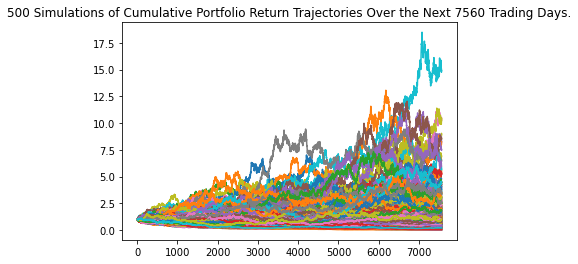

In [211]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_year_simulation.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

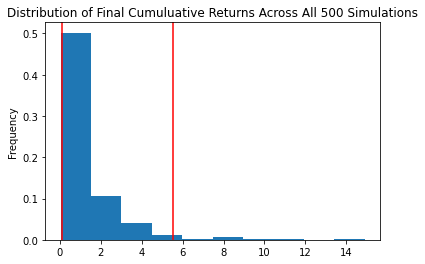

In [212]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_year_simulation.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [214]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
sumstats = thirty_year_simulation.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
display(sumstats)

count           500.000000
mean              1.284426
std               1.560777
min               0.037367
25%               0.417027
50%               0.781194
75%               1.549757
max              14.903972
95% CI Lower      0.092958
95% CI Upper      5.514083
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [217]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"${total_stocks_bonds}")


$71568.4


In [221]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = total_stocks_bonds * sumstats[8]
ci_upper_thirty_cumulative_return = total_stocks_bonds * sumstats[9]

# Print the result of your calculations
print(f"{ci_lower_thirty_cumulative_return:.02f}, {ci_upper_thirty_cumulative_return:.02f}")


6652.86, 394634.12


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [222]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
ten_year_simulation= MCSimulation(
    portfolio_data=ten_year_portfolio,
    weights=[0.2, 0.80],
    num_simulation=500,
    num_trading_days=252*10,
)

# Review the simulation input data
# YOUR CODE HERE
ten_year_simulation.portfolio_data

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2011-07-29 00:00:00-04:00  107.80  108.2001  107.7000  108.16  1095380.0   
2011-08-01 00:00:00-04:00  107.84  108.2300  107.8200  108.12  1238450.0   
2011-08-02 00:00:00-04:00  108.29  108.6700  108.1400  108.59   972946.0   
2011-08-03 00:00:00-04:00  108.69  108.9499  108.6100  108.70  1168138.0   
2011-08-04 00:00:00-04:00  108.80  109.3700  108.7600  109.26  1492192.0   
...                           ...       ...       ...     ...        ...   
2021-07-23 00:00:00-04:00  116.03  116.2200  116.0300  116.21  4137100.0   
2021-07-26 00:00:00-04:00  116.30  116.3300  116.0850  116.11  7028009.0   
2021-07-27 00:00:00-04:00  116.35  116.4000  116.2727  116.39  4669859.0   
2021-07-28 00:00:00-04:00  116.24  116.4900  116.1400  116.48  5189696.0   
2021-07-29 00:00:00-04:00  116.29  116.3600  116.2250  116.28  5216456.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2011-07-29 00:00:00-04:00    -0.010521  128.90  130.55  127.9667  129.32   
2011-08-01 00:00:00-04:00    -0.000370  130.84  130.96  127.5300  128.79   
2011-08-02 00:00:00-04:00     0.004347  127.80  128.50  125.4900  125.50   
2011-08-03 00:00:00-04:00     0.001013  125.66  126.31  123.5300  126.20   
2011-08-04 00:00:00-04:00     0.005152  124.42  124.62  120.0600  120.20   
...                                ...     ...     ...       ...     ...   
2021-07-23 00:00:00-04:00    -0.000688  437.53  440.30  436.7900  439.90   
2021-07-26 00:00:00-04:00    -0.000861  439.31  441.03  439.2600  440.99   
2021-07-27 00:00:00-04:00     0.002412  439.91  439.94  435.9900  439.00   
2021-07-28 00:00:00-04:00     0.000773  439.68  440.30  437.3100  438.84   
2021-07-29 00:00:00-04:00    -0.001717  439.83  441.80  439.8100  440.67   

                                                   
                              volume daily_return  
time                                               
2011-07-29 00:00:00-04:00  241904631    -0.311945  
2011-08-01 00:00:00-04:00  256121335    -0.004098  
2011-08-02 00:00:00-04:00  266792990    -0.025545  
2011-08-03 00:00:00-04:00  328781344     0.005578  
2011-08-04 00:00:00-04:00  435339364    -0.047544  
...                              ...          ...  
2021-07-23 00:00:00-04:00   53294703     0.010103  
2021-07-26 00:00:00-04:00   40155852     0.002478  
2021-07-27 00:00:00-04:00   61032234    -0.004513  
2021-07-28 00:00:00-04:00   47642330    -0.000364  
2021-07-29 00:00:00-04:00   40930880     0.004170  

[2520 rows x 12 columns]

In [223]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.973345,1.019452,1.009000,0.960279,0.999918,0.986827,1.004937,1.009959,1.005810,0.993558,...,0.989116,1.000544,1.020163,0.987703,0.965934,0.987501,0.970156,0.996478,1.008891,0.995096
2,0.990124,1.028128,1.016213,0.949368,0.982980,0.972873,0.997145,1.024180,1.003442,0.993120,...,0.975311,1.002492,1.021052,1.001656,0.985053,0.990787,0.977635,1.001476,1.022696,1.008120
3,0.994516,1.014116,0.991579,0.962321,1.002968,0.959587,0.994460,1.011600,0.983551,0.992026,...,0.967577,1.004520,1.020688,0.986348,1.018573,1.001626,1.004096,0.997353,1.030189,1.017559
4,0.959013,1.014929,1.001095,0.957425,0.979099,0.961349,0.987495,1.007904,0.994881,0.981999,...,0.960869,0.994274,1.046705,0.975189,1.025631,1.003916,0.979417,0.997789,1.035179,1.030098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.602864,0.609742,0.508229,0.611226,1.180314,1.767606,0.177663,1.381120,0.449381,0.585305,...,1.048417,0.426073,0.867205,1.019081,0.543669,0.988089,1.192633,0.597987,1.882421,2.296488
2517,0.583838,0.602360,0.518123,0.607686,1.180670,1.764696,0.179235,1.381261,0.446042,0.576361,...,1.030425,0.422729,0.878662,1.014978,0.547799,1.009711,1.173666,0.598273,1.905944,2.300195
2518,0.578004,0.602211,0.529694,0.615375,1.171461,1.807043,0.181434,1.396563,0.450365,0.559054,...,1.043054,0.419999,0.896235,1.020119,0.551352,1.003794,1.198708,0.595379,1.905820,2.322200
2519,0.575063,0.589261,0.531697,0.601810,1.163499,1.846753,0.179900,1.382566,0.453395,0.544642,...,1.064492,0.424519,0.881262,1.005060,0.553045,0.994156,1.209263,0.586366,1.935673,2.296717


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

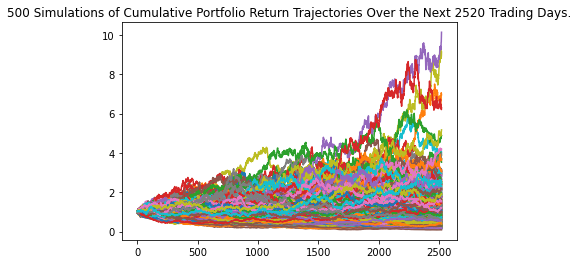

In [224]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

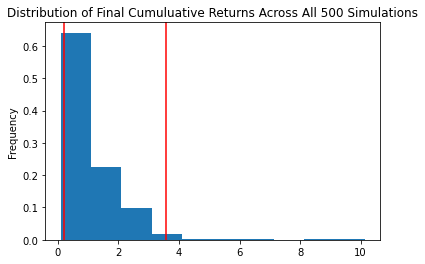

In [225]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_simulation.plot_distribution()


In [226]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_yr_sumstats = ten_year_simulation.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
ten_yr_sumstats

count           500.000000
mean              1.124610
std               1.032562
min               0.087254
25%               0.517191
50%               0.826476
75%               1.408678
max              10.138059
95% CI Lower      0.205283
95% CI Upper      3.581168
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [227]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"${total_stocks_bonds}")

$71568.4


In [228]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = total_stocks_bonds * ten_yr_sumstats[8]
ci_upper_ten_cumulative_return = total_stocks_bonds * ten_yr_sumstats[9]

# Print the result of your calculations
# YOUR CODE HERE
print(f"{ci_lower_ten_cumulative_return:.02f}, {ci_upper_ten_cumulative_return:.02f}")


14691.79, 256298.50


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

It certainly seems like weighting the portfolio towards stocks would be more profitable, as the SPY index has skyrocketed in comparison to the AGG, especially in the last half decade. I'm not sure it would let people retire after 10 years, I suppose it depends on the retirement goals of this individual. The mean is a bit higher on the portfolio that's 40 percent AGG in the Monte Carlo sim, but I think it would have a greater chance to compound if the heavy stock version was run for 30 years. All in all, I would probably recommend the heavier stock version of the portfolio (based on this data at least, I'm not sure the stock market will run as hot in the next 10 years as it did in the past 10), but I'm not sure retirement after only 10 years is particularly likely to happen.